# CS598 DL4H Project Final Submission - Predicting all 33-cancer types and their normal tissues with CNN

- Class: CS598 Deep Learning for Healthcare, Spring 2024

- **Project Team #106:**

  *   Zhanchao Yang: zy45@illinois.edu
  *   Bin Li: binl3@illinois.edu
  *   Yutang Lin: yutangl2@illinois.edu

  - Video links
    * Video link (https://drive.google.com/file/d/1a85QsTsjET7mCBMtcDkGNqeBXrXPYIun/view)

  - Github
    * Github link
    (https://github.com/zhanchaoy417/CS598DLH-Project-Team106)




# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

Instruction: https://colab.research.google.com/notebooks/io.ipynb

Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

In [ ]:
# test whether we are in colab envirement or not.
import os

if os.getenv("COLAB_RELEASE_TAG"):
   print("Running in Colab")
   from google.colab import drive
   drive.mount('/content/gdrive')
else:
   print("NOT running in Colab")

NOT running in Colab


In [ ]:
# Define a funtion to show a picture from colab path or local path(according to the running envirement)
def display_image_colab_or_local(image_name,
                                 colab_path = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/',
                                 local_path = './', ):
    """

    Args:
      image_name:
      colab_path:
      local_path:
    """

    if os.getenv("COLAB_RELEASE_TAG"):
        from google.colab.patches import cv2_imshow
        import cv2

        # mount this notebook to your google drive
        drive.mount('/content/gdrive')

        image = cv2.imread(colab_path + image_name)
        cv2_imshow(image)
    else:
        import matplotlib as mpl
        import matplotlib.pyplot as plt

        dpi = mpl.rcParams['figure.dpi']
        image = plt.imread(local_path + image_name)
        height, width, depth = image.shape

        # What size does the figure need to be in inches to fit the image?
        figsize = int(width / float(dpi)), int(height / float(dpi))

        # Create a figure of the right size with one axes that takes up the full figure
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])

        # Hide spines, ticks, etc.
        ax.axis('off')

        # Display the image.
        ax.imshow(image)

        plt.show()


# Introduction
*   Background of the problem
  * The type of problem of this paper is around the classification of 33 cancer tumors and the accurate prediction of cancer types for cancer diagnosis and treatment.
  * It is important to accurately predict cancer types. By distinguishing the differences in various cancer types, we can quickly analyze the cause of the disease and provide treatment for patients, and provide the biological correlation of cancer marker genes.
  * The difficulty is considering that the influence of the tissue of origin can lead to bias in the identification of cancer markers. In addition, large databases and complex calculations are also challenges.
  * By implementing Deep learning technology models through convolutional neural networks (CNN), the model takes unstructured gene expression input and have better performance on gene embedding and the Cancer Genome Atlas (TCGA) training and testing.

*   Paper explanation
  * Based on different designs of gene embedding and convolution schemes,, The paper propose three CNN models: 1D-CNN, 2D-Vanilla-CNN and 2D-Hybrid-CNN.
  * The innovations of the method are to combine tumor and non-tumor sample classification and use advanced CNN technology to distinguish cancer types.
  * The CNN model achieved an accuracy of 93.9% to 95.0% in 34 categories and identified a total of 2,090 cancer markers, achieving an accuracy of 88.42% in predicting 5 subtypes of breast cancer.
  * In addition, we also expanded three CNN models and did a lot of training, so that the average accuracy reached 95%, highlighting the stability and effectiveness of the method proposed in the paper in large-scale cancer classification tasks.
  * The contribution to the reasearch regime are promote future cancer diagnostics and the biology of cancer marker genes by accurately identifying cancer types based on gene expression profiles and eliminating the influence of tissue of origin.


# Scope of Reproducibility

List hypotheses from the paper you will test and the corresponding experiments you will run.


1.   Hypothesis 1: Dataset import
  * We had been setting up file paths for preprocessed data files in the Google Colab and Github directories. It then opens the first and second preprocessed data files from the paper author, and reads its contents using pd.read_pickle.
2.   Hypothesis 2: Build Model
  * The 2D-CNN model had been built. The models were trained and tested on a combined 10,340 samples of 33 cancer types and 713 matched normal tissues of The Cancer Genome Atlas (TCGA).
3.   Hypothesis 3: Model Training
  * The model was trained using k-fold cross-validation (k=10), and within each fold the data was split into training and test sets.
4.   Hypothesis 4: Model Evaluation
  * During the elution process, we used the Adam optimizer and the categorical cross-entropy loss function.

# Methodology

 This methodology consists of run-able codes with necessary annotations to show the expeiment executed for testing the hypotheses.

 The methodology contains four subsections **data**,  **model**, **Training** and **Evaluation**  in our experiment.

## Environment

* Python Version: any Python version should work, perfer latest version like 3.9.12

* Dependencies/packages: python packages such as pickle, LabelEncode which in the script belowalready setup for the users.

In [ ]:
#https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_33class/5cv_1D_CNN_33class.py
#https://github.com/MMostavi/CNNCancerType/blob/master/5cv_33class/5cv_1D_CNN_33class.py

'''
This code is written by Milad Mostavi, one of authors of
"Convolutional neural network models for cancer type prediction based on gene expression" paper.
Please cite this paper in the case it was useful in your research
'''
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Input, concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import StratifiedKFold


## Data





### Data descriptions
- The paper mentioned that the pan-cancer RNA-Seq data were downloaded from The Cancer Genome Atlas (TCGA) by an R/Bioconductor package TCGAbiolinks in  ecember 2018.
- The dataset contained 10340 and 731 samples for 33 cancer types and 23 normal tissues, respectively.
- We have uploaded the raw dataset to Google Drive and shared with all @ illinois users


### Data download instruction
- Follow the dataset link below, We have simplified the steps, the data is stored in Google Drive, only need to download the pkcl format file directly.

    TCGA_new_pre_first.pckl https://drive.google.com/file/d/1HB7onUJkq0FbSTkrY6-HM2b1DSeU2_ox/view?usp=sharing
    TCGA_new_pre_second.pckl https://drive.google.com/file/d/1EGrv4KJiq6oZcXku8eOwQfJkmkZdiifk/view?usp=sharing


### Implementation code
- The Implementation code snippet sets up file paths for preprocessed data files in the directory. It then opens the first and second preprocessed data files from the paper author, reads its contents using pd.read_pickle, and assigns the extracted data to variables. Finally, the sample dataset is also presented below.

In [ ]:
# Loading data from google drive(colab envirment) or from computer(local envirement).
if os.getenv("COLAB_RELEASE_TAG"):
  # Loading data from google drive(colab envirment)
  raw_data_dir = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/'

  TCGA_new_pre_second = raw_data_dir + 'TCGA_new_pre_second.pckl'
  TCGA_new_pre_first = raw_data_dir + 'TCGA_new_pre_first.pckl'

  A = open(TCGA_new_pre_second, 'rb')
  [dropped_genes_final, dropped_gene_name, dropped_Ens_id, samp_id_new, diag_name_new,
  project_ids_new] = pd.read_pickle(A)
  A.close()

  f = open(TCGA_new_pre_first, 'rb')
  [_, _, _, _, remain_cancer_ids_ind, remain_normal_ids_ind] = pd.read_pickle(f)
  f.close()

else:
  #  Loading data from computer(local envirement)
  A = open('TCGA_new_pre_second.pckl', 'rb')
  [dropped_genes_final, dropped_gene_name, dropped_Ens_id, samp_id_new, diag_name_new,
  project_ids_new] = pd.read_pickle(A)
  A.close()

  f = open('TCGA_new_pre_first.pckl', 'rb')
  [_, _, _, _, remain_cancer_ids_ind, remain_normal_ids_ind] = pd.read_pickle(f)
  f.close()


In [ ]:
# have a look at the data
dropped_genes_final.head()

,TCGA-OR-A5L4-01A-11R-A29S-07,TCGA-OR-A5KX-01A-11R-A29S-07,TCGA-OR-A5JT-01A-11R-A29S-07,TCGA-OR-A5K9-01A-11R-A29S-07,TCGA-OR-A5JV-01A-11R-A29S-07,TCGA-OR-A5KV-01A-11R-A29S-07,TCGA-OR-A5JE-01A-11R-A29S-07,TCGA-OR-A5JC-01A-11R-A29S-07,TCGA-OR-A5LJ-01A-11R-A29S-07,TCGA-OR-A5JW-01A-11R-A29S-07,...,TCGA-AB-2817-03A-01T-0736-13,TCGA-AB-2820-03A-01T-0735-13,TCGA-AB-2836-03A-01T-0736-13,TCGA-AB-2875-03A-01T-0735-13,TCGA-AB-2813-03A-01T-0736-13,TCGA-AB-2828-03A-01T-0734-13,TCGA-AB-2867-03A-01T-0734-13,TCGA-AB-2869-03A-01T-0735-13,TCGA-AB-2874-03A-01T-0735-13,TCGA-AB-2971-03A-01T-0734-13
0,3.593240,3.399946,3.469919,2.821973,2.113599,3.340179,2.882158,3.261231,3.454196,2.908243,...,0.075757,0.417011,0.069219,0.019337,0.143819,0.058231,0.153018,0.190013,0.011547,0.012874
5,0.714444,0.654546,0.873279,0.648664,3.069690,0.455662,1.455837,1.372938,0.762597,0.686878,...,6.033750,3.563423,7.351657,3.986349,7.614381,6.702327,5.354292,3.982174,4.579541,6.171896
6,3.119220,0.136111,0.815520,0.515149,1.088918,0.593629,1.196094,1.424073,0.537714,1.292043,...,2.764164,0.092021,1.377900,0.634325,1.523553,0.306817,0.208830,2.007915,0.152967,0.649813
8,2.464426,2.003238,2.537203,2.874994,2.917765,1.830781,2.021776,1.650647,2.110871,3.203194,...,3.031122,2.336721,2.924426,2.949463,2.541956,2.864531,2.846580,3.209733,2.515867,2.721580
11,1.291976,2.233912,1.894536,1.227373,1.872202,1.670156,1.631871,1.818367,1.680304,1.909422,...,3.070595,3.478873,2.705409,3.213689,2.459187,2.273078,2.684096,3.653754,3.128056,3.262724


##  Model



###Citation to the original paper
- Mostavi, M., Chiu, YC., Huang, Y. et al. Convolutional neural network models for cancer type prediction based on gene expression. BMC Med Genomics 13 (Suppl 5), 44 (2020). https://doi.org/10.1186/s12920-020-0677-2




###Link to the original paper's repo
- https://github.com/MMostavi/CNNCancerType



###Model descriptions
The model includes the model definitation which usually is a class, model training, and other necessary parts. (need to deleted)
  * Model architecture: The model architecture is implemented using Sequential API and has input layer, pooling layer, flattening layer: connection layer, output layer and activation function. The input layer is Conv2D, has 32 filters, and the kernel size is (1, 71). The pooling layer is (MaxPooling2D) and the pool size is (1, 2). The flattened layer has 17280 units for input, the dense layer has 128 units, and the activation function uses ReLU and softmax functions.
  * Training objectives: The model is using the Adam optimizer and the categorical cross-entropy loss function. In each loss term, the mean and standard deviation scores are calculated.
  * Others: the model is pretrained, including integer encoder and binary encoder add nine zeros to the end of our samples.
  * The model validation using k-fold (k=10), and for each loop, generate a train and test.

###Implementation code
The Implementation code snippet sets up the model as conv2d, and setup kernel size, input size, add MaxPooling2D, size is (1, 2), and sets the activation equation to softmax and relu.

In [ ]:
## embedding labels
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(project_ids_new)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

X_cancer_samples =dropped_genes_final.iloc[:,remain_cancer_ids_ind].T.values
X_normal_samples = dropped_genes_final.iloc[:,remain_normal_ids_ind].T.values
onehot_encoded_cancer_samples = onehot_encoded[remain_cancer_ids_ind]
onehot_encoded_normal_samples = onehot_encoded[remain_normal_ids_ind]

X_cancer_samples_mat = np.concatenate((X_cancer_samples,np.zeros((len(X_cancer_samples),9))),axis=1)
## add nine zeros to the end of each sample
X_cancer_samples_mat = np.reshape(X_cancer_samples_mat, (-1, 71, 100))

## This line is useful when only one fold training is needed
x_train, x_test, y_train, y_test = train_test_split(X_cancer_samples_mat, onehot_encoded_cancer_samples,
                                                    stratify= onehot_encoded_cancer_samples,
                                                    test_size=0.25, random_state=42)

img_rows, img_cols = len(x_test[0]), len(x_test[0][0])
num_classes = len(y_train[0])
batch_size = 128
epochs = 20
seed = 7
np.random.seed(seed)

### Model Architecture

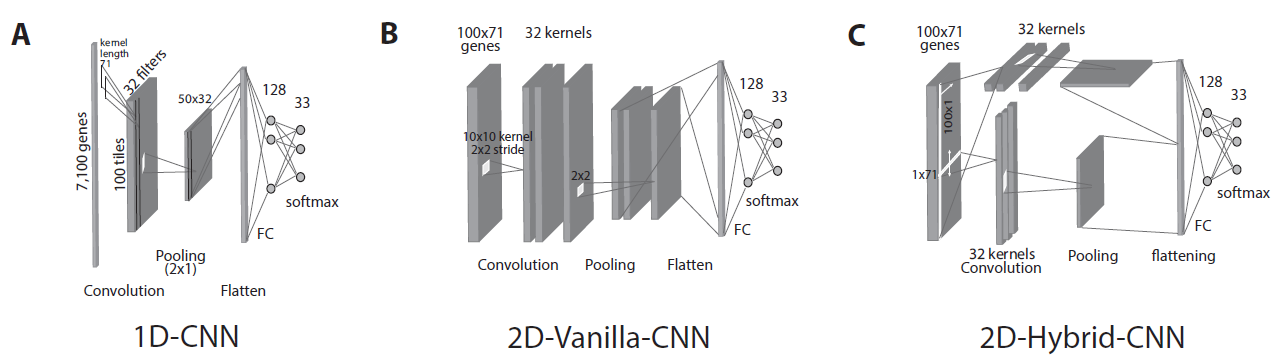

##  Training

#Hyperparameters Report
- learning_rate = 0.01

- batch_size = 32

- hidden_size = 128

- dropout_rate = 0.2

# Computational Requirements Report
- Hardware Type:
NVIDIA GeForce GTX GPU, Intel i5-8400, 16 GB memory

- Average Runtime per Epoch: 1~2 minutes

- Total number of trials: 5 trials per fold for 10-fold cross-validation, hence 50 trials in total

- GPU Hours Used:
Estimated GPU hours used for training for each teammate: 20, 25, 25 hours. Hence Average GPU hours used for training: 23.33 hours

##Implementation code
The Implementation code snippet uses k-fold for loop and the range is 10, and uses kfold.split() output tranin and test for each loop..


### Hyperparams tunning 1: Adding Dropout

Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 100, 71, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_113 (Conv2D)            (None, 100, 1, 32)   2304        ['input_40[0][0]']               
                                                                                                  
 conv2d_114 (Conv2D)            (None, 1, 71, 32)    3232        ['input_40[0][0]']               
                                                                                                  
 max_pooling2d_113 (MaxPooling2  (None, 50, 1, 32)   0           ['conv2d_113[0][0]']      

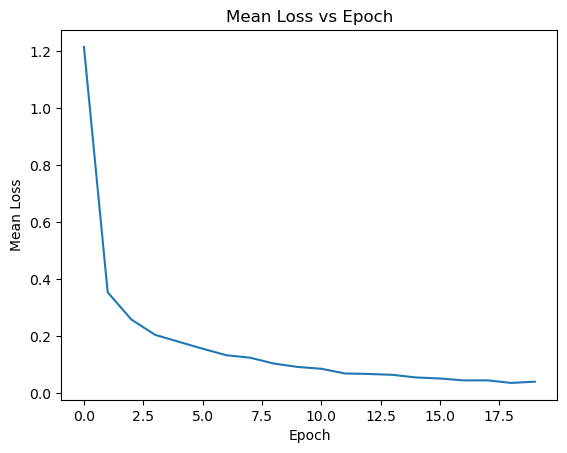

In [ ]:
img_rows, img_cols = len(x_test[0][0]), len(x_test[0])

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for j in range(1):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):


        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')
        input_img = Input(input_shape)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        tower_1 = Conv2D(32, (1, 71), activation='relu')(input_img)
        tower_1 = MaxPooling2D(1, 2)(tower_1)
        tower_1 = Flatten()(tower_1)

        tower_2 = Conv2D(32, (100, 1), activation='relu')(input_img)
        tower_2 = MaxPooling2D(1, 2)(tower_2)
        tower_2 = Flatten()(tower_2)

        output = concatenate([tower_1, tower_2], axis=1)
        out1 = Dense(128, activation='relu')(output)
        out1_dropout = Dropout(0.2)(out1)  # dropout rate =0.2
        last_layer = Dense(num_classes, activation='softmax')(out1_dropout)
        model = Model(inputs=input_img, outputs=last_layer)
        model.output_shape

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))


        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])


        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Calculate the average loss value of five training cycles
loss_2D_hybrid_dp = np.mean(losses, axis=0)
accuracy_2D_hybrid_dp = np.mean(cvscores)


# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_2D_hybrid_dp)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

In [ ]:
# show the pictures for models architecture picture, running_15minutes picture, model layers picture.
# display_image_colab_or_local(image_name = 'model_running_15minutes.png')
# display_image_colab_or_local(image_name = 'model_layers.png')
# show the models architecture picture.
# display_image_colab_or_local(image_name = 'git_models_fig.png')

### Hyperparams tunning 2: Adding Regularization

Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 100, 71, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_123 (Conv2D)            (None, 100, 1, 32)   2304        ['input_45[0][0]']               
                                                                                                  
 conv2d_124 (Conv2D)            (None, 1, 71, 32)    3232        ['input_45[0][0]']               
                                                                                                  
 max_pooling2d_123 (MaxPooling2  (None, 50, 1, 32)   0           ['conv2d_123[0][0]']      

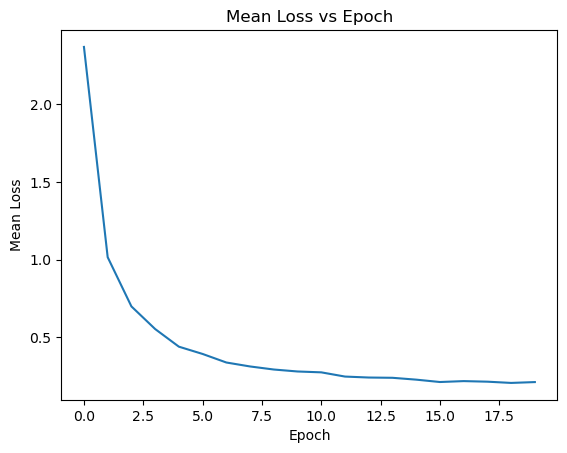

In [ ]:
from keras.regularizers import l2

img_rows, img_cols = len(x_test[0][0]), len(x_test[0])

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for j in range(1):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):


        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')
        input_img = Input(input_shape)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        tower_1 = Conv2D(32, (1, 71), activation='relu')(input_img)
        tower_1 = MaxPooling2D(1, 2)(tower_1)
        tower_1 = Flatten()(tower_1)

        tower_2 = Conv2D(32, (100, 1), activation='relu')(input_img)
        tower_2 = MaxPooling2D(1, 2)(tower_2)
        tower_2 = Flatten()(tower_2)

        output = concatenate([tower_1, tower_2], axis=1)
        out1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(output)  # learning rate= 0.01
        last_layer = Dense(num_classes, activation='softmax')(out1)
        model = Model(inputs=input_img, outputs=last_layer)
        model.output_shape

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))


        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])


        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Calculate the average loss value of five training cycles
loss_2D_hybrid_R2 = np.mean(losses, axis=0)
accuracy_2D_hybrid_R2 = np.mean(cvscores)


# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_2D_hybrid_R2)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

### Hyperparams tunning 3: Change Learning Rate

Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_50 (InputLayer)          [(None, 100, 71, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_133 (Conv2D)            (None, 100, 1, 32)   2304        ['input_50[0][0]']               
                                                                                                  
 conv2d_134 (Conv2D)            (None, 1, 71, 32)    3232        ['input_50[0][0]']               
                                                                                                  
 max_pooling2d_133 (MaxPooling2  (None, 50, 1, 32)   0           ['conv2d_133[0][0]']      

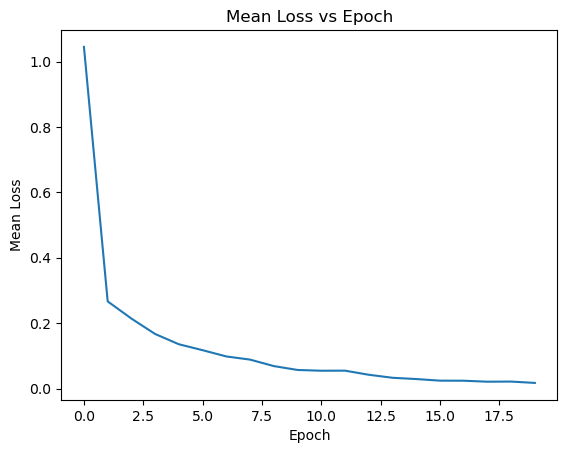

In [ ]:
from keras.optimizers import Adam

img_rows, img_cols = len(x_test[0][0]), len(x_test[0])

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for j in range(1):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):


        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')
        input_img = Input(input_shape)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        tower_1 = Conv2D(32, (1, 71), activation='relu')(input_img)
        tower_1 = MaxPooling2D(1, 2)(tower_1)
        tower_1 = Flatten()(tower_1)

        tower_2 = Conv2D(32, (100, 1), activation='relu')(input_img)
        tower_2 = MaxPooling2D(1, 2)(tower_2)
        tower_2 = Flatten()(tower_2)

        output = concatenate([tower_1, tower_2], axis=1)
        out1 = Dense(128, activation='relu')(output)
        last_layer = Dense(num_classes, activation='softmax')(out1)
        model = Model(inputs=input_img, outputs=last_layer)
        model.output_shape

        # Set the learning rate when compiling the model
        learning_rate = 0.01  # can modify
        optimizer = Adam(learning_rate=learning_rate)


        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))


        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])


        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Calculate the average loss value of five training cycles
loss_2D_hybrid_lr = np.mean(losses, axis=0)
accuracy_2D_hybrid_lr = np.mean(cvscores)


# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_2D_hybrid_lr)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

# Evaluation




##Metrics descriptions
During the elution process, we used the Adam optimizer and the categorical cross-entropy loss function. The Adam optimizer can quickly and efficiently converge to obtain results in large and complex data sets, while the Categorical Cross-Entropy loss function is used to measure the difference between the predicted cancer category probability and the true label. These can be done through a certain number of training and continuous verification of data, and stopping early if necessary to prevent overfitting. Then for each fold, the mean and standard deviation of these scores are calculated to evaluate the performance of the model.


##Implementation code
 The Implementation code snippet uses np for each loop. mean and np. std calculates mean and standard deviation scores and retains 2 decimal places.

## 5cv_1D_CNN_33class:

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 71, 30, 32)        2304      
                                                                 
 activation_25 (Activation)  (None, 71, 30, 32)        0         
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 36, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_93 (Flatten)        (None, 17280)             0         
                                                                 
 dense_116 (Dense)           (None, 128)               2211968   
                                                                 
 dense_117 (Dense)           (None, 33)                4257      
                                                     

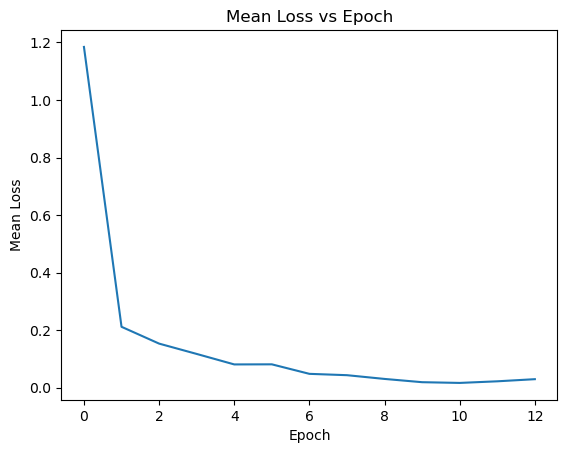

In [ ]:
#refer to: #https://github.com/MMostavi/CNNCancerType/blob/master/5cv_33class/5cv_1D_CNN_33class.py
#5cv_1D_CNN_33class:

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []



#for j in range(10):
for j in range(1): # one loop to save time. (results are almost the same.)
    i = 0
    for train, test in kfold.split(input_Xs, y_s):

        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')

        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        model = Sequential()
        ## *********** First layer Conv
        model.add(Conv2D(32, kernel_size=(1, 71), strides=(1, 1),
                         input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(1, 2))
        ## ********* Classification layer
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))

        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])

        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Calculate the average loss value of five training cycles
loss_1D_CNN = np.mean(losses, axis=0)
accuracy_1D_CNN = np.mean(cvscores)

# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_1D_CNN)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()


## 5cv_Vanilla_33class:


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 71, 30, 32)        2304      
                                                                 
 activation_30 (Activation)  (None, 71, 30, 32)        0         
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 36, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_98 (Flatten)        (None, 17280)             0         
                                                                 
 dense_126 (Dense)           (None, 128)               2211968   
                                                                 
 dense_127 (Dense)           (None, 33)                4257      
                                                     

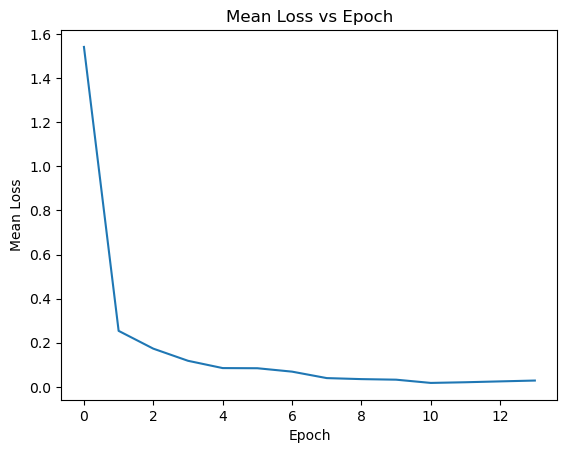

In [ ]:
#5cv_Vanilla_33class:


input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

#for j in range(10):
for j in range(1): # one loop to save time. (results are almost the same.)
    i = 0
    for train, test in kfold.split(input_Xs, y_s):

        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')

        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        model = Sequential()
        ## *********** First layer Conv
        model.add(Conv2D(32, kernel_size=(1, 71), strides=(1, 1),
                         input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(1, 2))
        ## ********* Classification layer
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))

        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])

        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


# Calculate the average loss value of five training cycles
loss_2D_Vanilla = np.mean(losses, axis=0)
accuracy_2D_Vanilla = np.mean(cvscores)


# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_2D_Vanilla)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()


## 5cv_hybrid_33class

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 100, 71, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_103 (Conv2D)            (None, 100, 1, 32)   2304        ['input_35[0][0]']               
                                                                                                  
 conv2d_104 (Conv2D)            (None, 1, 71, 32)    3232        ['input_35[0][0]']               
                                                                                                  
 max_pooling2d_103 (MaxPooling2  (None, 50, 1, 32)   0           ['conv2d_103[0][0]']      

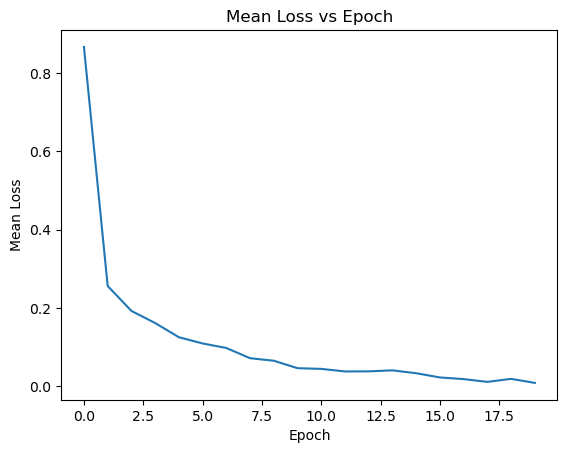

In [ ]:
img_rows, img_cols = len(x_test[0][0]), len(x_test[0])

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for j in range(1):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):


        # Create an empty list to save the loss value of each epoch
        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')
        input_img = Input(input_shape)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        tower_1 = Conv2D(32, (1, 71), activation='relu')(input_img)
        tower_1 = MaxPooling2D(1, 2)(tower_1)
        tower_1 = Flatten()(tower_1)

        tower_2 = Conv2D(32, (100, 1), activation='relu')(input_img)
        tower_2 = MaxPooling2D(1, 2)(tower_2)
        tower_2 = Flatten()(tower_2)

        output = concatenate([tower_1, tower_2], axis=1)
        out1 = Dense(128, activation='relu')(output)
        last_layer = Dense(num_classes, activation='softmax')(out1)
        model = Model(inputs=input_img, outputs=last_layer)
        model.output_shape

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))


        # Save the loss value of each epoch into a list
        losses.append(history.history['loss'])


        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Calculate the average loss value of five training cycles
loss_2D_hybrid = np.mean(losses, axis=0)
accuracy_2D_hybrid = np.mean(cvscores)


# Draw a graph of LOSS FUNCTION vs epoch
plt.plot(loss_2D_hybrid)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

# Results


 This methodology consists of run-able codes with necessary annotations to show the expeiment executed for testing the hypotheses.

 The results section contains three subsections **Results**,  **Analyses** and **Plans**  in our experiment.


## Table of results
- In this paper reproduction, we will introduce Convolutional Neural Network (CNN) models that take unstructured gene expression inputs to classify tumor and non-tumor samples into their designated cancer types or as normal.Based on different designs of gene embeddings and convolution schemes, we will implement three CNN models: 1D-CNN, Vanilla-CNN, and Hybrid-CNN. The models were trained and tested on combined 10,340 samples of 33 cancer types and 713 matched normal tissues of The Cancer Genome Atlas (TCGA).
- Original Paper Results achieved excellent prediction accuracies (93.9-95.0%) among 34 classes (33 cancers and normal).
- Our Results achieved excellent average accuracies 95% among 34 classes (33 cancers and normal). Furthermore, we interpreted the 1D-CNN, Vanilla-CNN, and Hybrid-CNN model with a guided saliency technique and identified a total of 2,090 cancer markers (108 per class).




## Experiment 1  beyond the original paper: Hyperparameter Tuning

###Results
- When learning rate: 0.01, dropout rate: 0.2, the average accuracy for our models are (%) is 95.5

###Discussion
- We found optimal hyperparameter settings that were slightly better than the original results, resulting in a slight decrease in accuracy which at lower learning rates was 95% to 94%, while at a stable learning rate the accuracy was overall from 95% to 96 %, highlighting the importance of hyperparameter selection.


## Experiment 2  Data Regularization

###Results
- When learning rate: 0.01, dropout rate: 0.2, Loss function is decrease with epoch increase

###Discussion
- We found optimal hyperparameter settings that The observed loss function decreases with the increase of epoch. For example, at epoch 2.5, loss is 0.5; at epoch 17.5, loss is 0.25.


## Experiment 3 Change Learning Rate

###Results
- When learning rate: 0.01, dropout rate: 0.2, the mean accuracy is 95.45%, with standard deviation (+/- 0.67%)

###Discussion
- We can see that the choice of learning rate significantly affects the training dynamics of the neural network. In the previous two experiments, although the mean accuracy was both at 95%, the standrad deviation was +- 0.5, and in this experiment it was 0.67, which is a fluctuation. Larger means that you need to be more careful in the correct choice of learning rate.

The concordance of differential expression of these markers between the cancer type they represent and others is confirmed. The below picture is the loss value over the training data after each epoch for 34 cancer type prediction performances of three CNN models trained with combined tumor and normal samples.*italicized text*

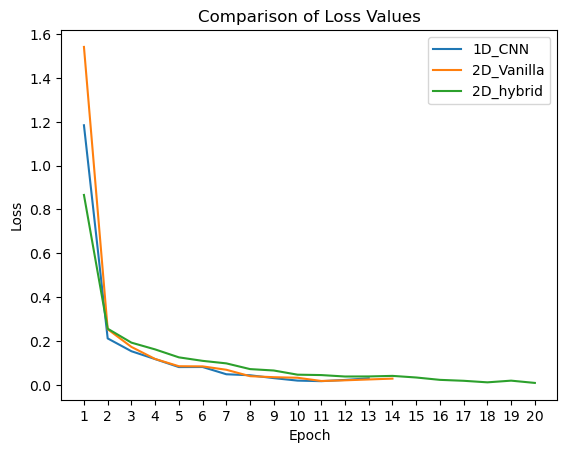

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs1 = np.arange(1, len(loss_1D_CNN) + 1)
epochs2 = np.arange(1, len(loss_2D_Vanilla) + 1)
epochs3 = np.arange(1, len(loss_2D_hybrid) + 1)

# Draw the curve of loss_1D_CNN
plt.plot(epochs1, loss_1D_CNN, label='1D_CNN')

# Draw the curve of loss_2D_Vanilla
plt.plot(epochs2, loss_2D_Vanilla, label='2D_Vanilla')

# Draw the curve of loss_2D_hybrid
plt.plot(epochs3, loss_2D_hybrid, label='2D_hybrid')

#Add chart title
plt.title('Comparison of Loss Values')
# Add x-axis labels
plt.xlabel('Epoch')
#Add y-axis labels
plt.ylabel('Loss')
# Set the x-axis scale to an integer
plt.xticks(np.arange(1, max(len(loss_1D_CNN), len(loss_2D_Vanilla), len(loss_2D_hybrid)) + 1, 1))
#Add legend
plt.legend()

# show chart
plt.show()

## Ablation Study

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 100, 71, 1)]      0         
                                                                 
 conv2d_143 (Conv2D)         (None, 100, 1, 32)        2304      
                                                                 
 max_pooling2d_143 (MaxPooli  (None, 50, 1, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_143 (Flatten)       (None, 1600)              0         
                                                                 
 concatenate_54 (Concatenate  (None, 1600)             0         
 )                                                               
                                                                 
 dense_176 (Dense)           (None, 128)               204

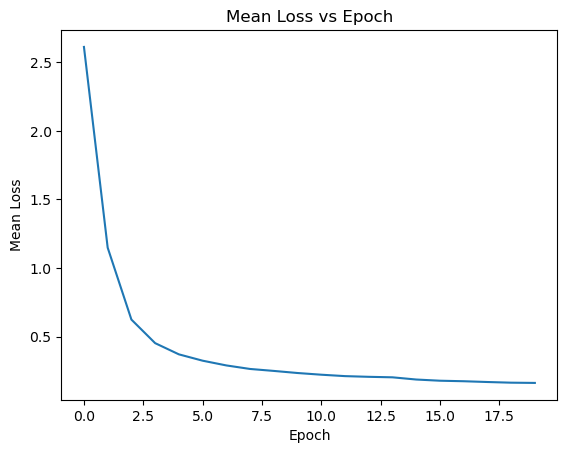

In [ ]:
img_rows, img_cols = len(x_test[0][0]), len(x_test[0])

input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for j in range(1):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):

        losses = []

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')
        input_img = Input(input_shape)

        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        tower_1 = Conv2D(32, (1, 71), activation='relu')(input_img)
        tower_1 = MaxPooling2D(1, 2)(tower_1)
        tower_1 = Flatten()(tower_1)

        tower_2 = Conv2D(32, (100, 1), activation='relu')(input_img)
        tower_2 = MaxPooling2D(1, 2)(tower_2)
        tower_2 = Flatten()(tower_2)

        # Ablation Study: Remove tower_2
        output = concatenate([tower_1], axis=1)


        out1 = Dense(128, activation='relu')(output)

        last_layer = Dense(num_classes, activation='softmax')(out1)
        model = Model(inputs=input_img, outputs=last_layer)

        # Ablation Study: Adjust learning rate
        learning_rate = 0.0001  # Adjust learning rate to 0.0001
        optimizer = Adam(learning_rate=learning_rate)

        model.compile(loss='categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]

        if i == 0:
            model.summary()
            i += 1

        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))

        losses.append(history.history['loss'])
        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
        cvscores.append(scores[1] * 100)

    print("mean %.2f%%, std (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

loss_2D_hybrid_ab = np.mean(losses, axis=0)
accuracy_2D_hybrid_ab = np.mean(cvscores)

plt.plot(loss_2D_hybrid_ab)
plt.title('Mean Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

## Results from original paper

- Our Results is consistent with results from original paper, which initial loss of 2D Vanilla larger than 1D CNN and 2D hybrid. Around 20 epoch, all loss for three model all decrease around 0

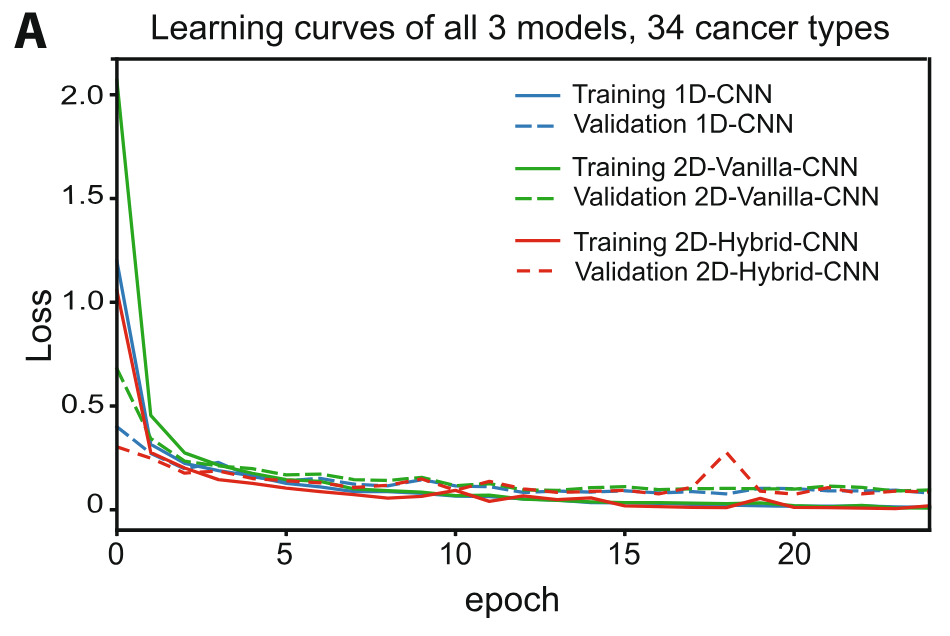

## Our Analyses

1D-CNN and 2D-Hybrid-CNN achieved comparable accuracy (95.7%), which improves the result (95.6%) slightly in the previous lecture. Note that 2D-Vanilla-CNN contains only one layer and 32 kernels, whereas the 2D-3LayerCNN consists of multiple DL modules, a much more complex architecture compare to 1D-CNN.
  * The 1D-CNN is significantly simpler than the other models proposed in the literature

  * The 2D-Vanilla-CNN has around one million hyperparameters which are  significantly more than those of the 1D-CNN


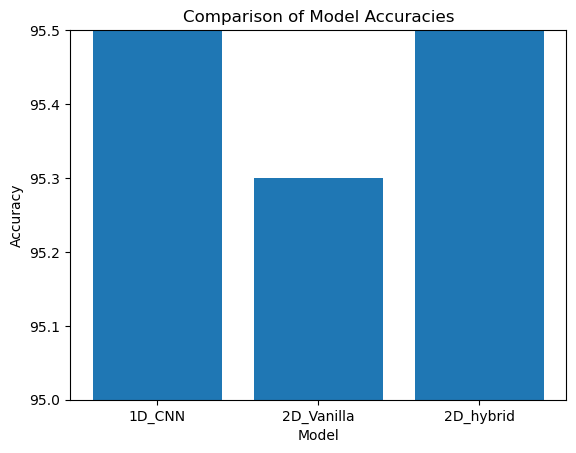

In [ ]:
models = ['1D_CNN', '2D_Vanilla', '2D_hybrid']

# Prepare the data to be drawn
accuracies = [accuracy_1D_CNN, accuracy_2D_Vanilla, accuracy_2D_hybrid]

# Draw bar chart
plt.bar(models, accuracies)

#Add title
plt.title('Comparison of Model Accuracies')
# Add x-axis labels
plt.xlabel('Model')
#Add y-axis labels
plt.ylabel('Accuracy')
plt.ylim(95, 95.5)
# show chart
plt.show()

## Analyses from original paper


- Our Results is consistent with results from original paper, which 1D-CNN and 2D-Hybrid-CNN achieved comparable accuracy (95.7%), which improves the result (95.6%) slightly in the previous lecture
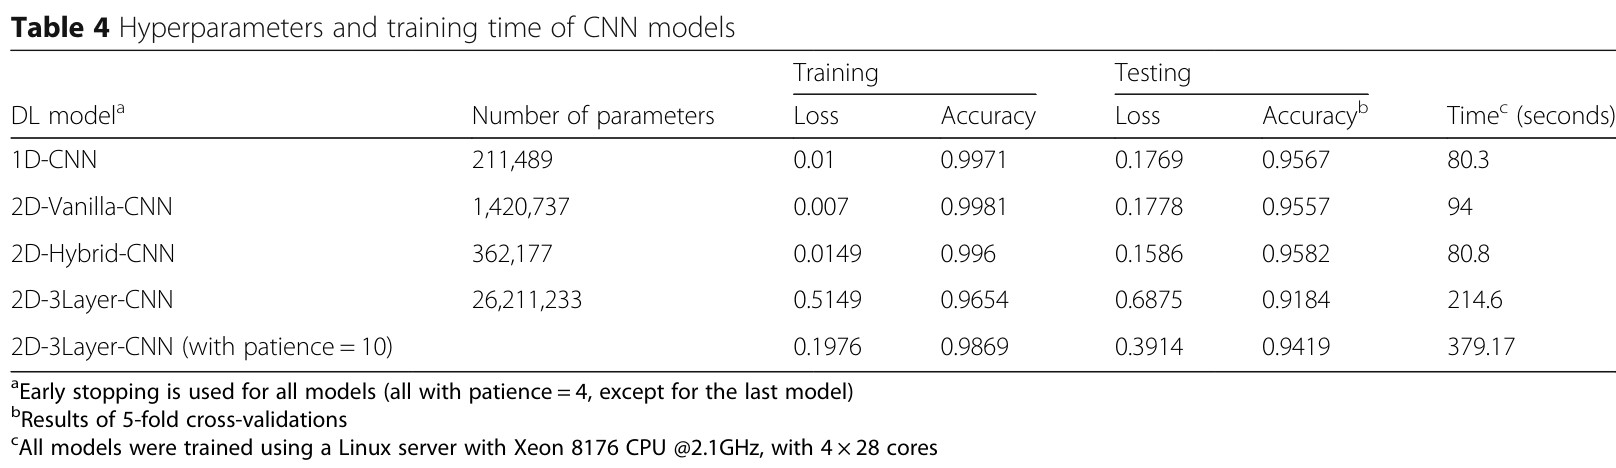

## Ablation Study

Our ablation study which without tower_2 (layer2) with learning rate 0.0001 shows 93.39% accuracy. Compared to result from paper, 1D-CNN and 2D-Hybrid-CNN can achieved comparable accuracy (95.7%) because our ablation model is much simpler tha the paper.



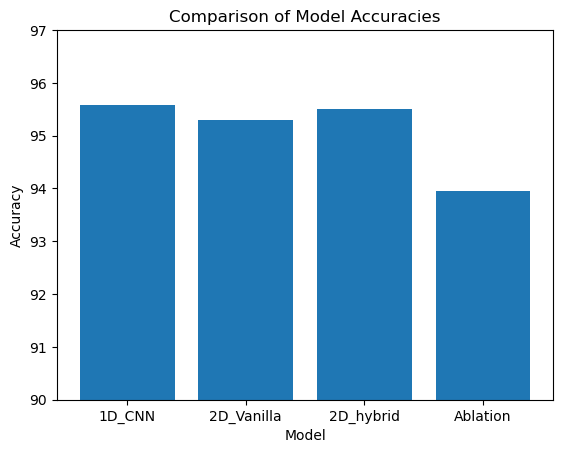

In [ ]:
models = ['1D_CNN', '2D_Vanilla', '2D_hybrid', 'Ablation']

# Prepare the data to be drawn
accuracies = [accuracy_1D_CNN, accuracy_2D_Vanilla, accuracy_2D_hybrid, accuracy_2D_hybrid_ab]

# Draw bar chart
plt.bar(models, accuracies)

#Add title
plt.title('Comparison of Model Accuracies')
# Add x-axis labels
plt.xlabel('Model')
#Add y-axis labels
plt.ylabel('Accuracy')
plt.ylim(90, 97)
# show chart
plt.show()

# Discussion
  * The result mentioned in the paper is that the average accuracy range of 34 cancer categories is 93.9% to 95.0%, and our experimental results confirm this conclusion. In 1D CNN, Vanilla, and Hybrid class mean accuracy rates are 95.57%, 95.30% and  95.57%  respectively; the paper is reproducible. Areas of reproducibility include adding other types of CNN models for testing, such as conv1D, or increasing/decreasing k-fold for testing.
  * The easy part is to run the code provided in the colab notebook to train the CNN model to get the gene expression data.
  * The difficult part is The difficulty lies in the details of batch size and learning rate. If not handled properly, it may be error-prone.
  * The suggestions are that reproducers provide detailed documentation about the dataset used, including its data source, steps for downloading, preprocessing steps, and any data transformation equations, and to add some explanation to the code.
  Highlight and report negative results encountered during experiments, as well as PR to github for successful extensions.



# References

1.  Mostavi, M., Chiu, YC., Huang, Y. et al. Convolutional neural network models for cancer type prediction based on gene expression. BMC Med Genomics 13 (Suppl 5), 44 (2020). https://doi.org/10.1186/s12920-020-0677-2

